# Project: Wine quality classification

# About the datases:

link to hte dataset at Kaggle:
https://www.kaggle.com/danielpanizzo/wine-quality

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Missing Attribute Values: None

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

<h4>Steps:</h4>
<ol>
  <li>Data Analysis</li>
  <li>Feature Engineering</li>
  <li>Feature Selection</li>
  <li>Model Training</li>
  <li>Obtaining Predictions / Scoring</li>
</ol>

<b>Dependencies and versions</b>

In [1]:
# importing libraries
from platform import python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)

Python version: 3.8.8
NumPy version: 1.20.2
Pandas version: 1.2.4
SciPy version: 1.6.2


<h2>STEP 1: Data analysis</h2>

In [3]:
# importing the dataset
df = pd.read_csv("wineQualityReds.csv", index_col=0)

In [4]:
# shape
df.shape

(1599, 12)

In [5]:
# showing first five rows of the dateset
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# showing data types
df.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# checking missing values
df.isnull().any(axis = 1).sum()

0

In [8]:
# checking duplicated rows
df.duplicated().sum()

240

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# checking duplicated rows
df.duplicated().sum()

0

In [11]:
# displaying the target
target = df['quality'].value_counts().to_frame()
target['ratio %'] = (target['quality'] / df['quality'].count() * 100).round(1)
target

,quality,ratio %
5,577,42.5
6,535,39.4
7,167,12.3
4,53,3.9
8,17,1.3
3,10,0.7


The target is imbalanced

In [12]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var != 'quality']
# number of numerical variables
len(num_vars)

11

<b>Discrete variables</b>

In [13]:
#  making a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


<b>Continuous variables</b>

In [14]:
# making list of continuous variables
cont_vars = num_vars
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  11


In [15]:
#continuous variables
df[cont_vars].head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


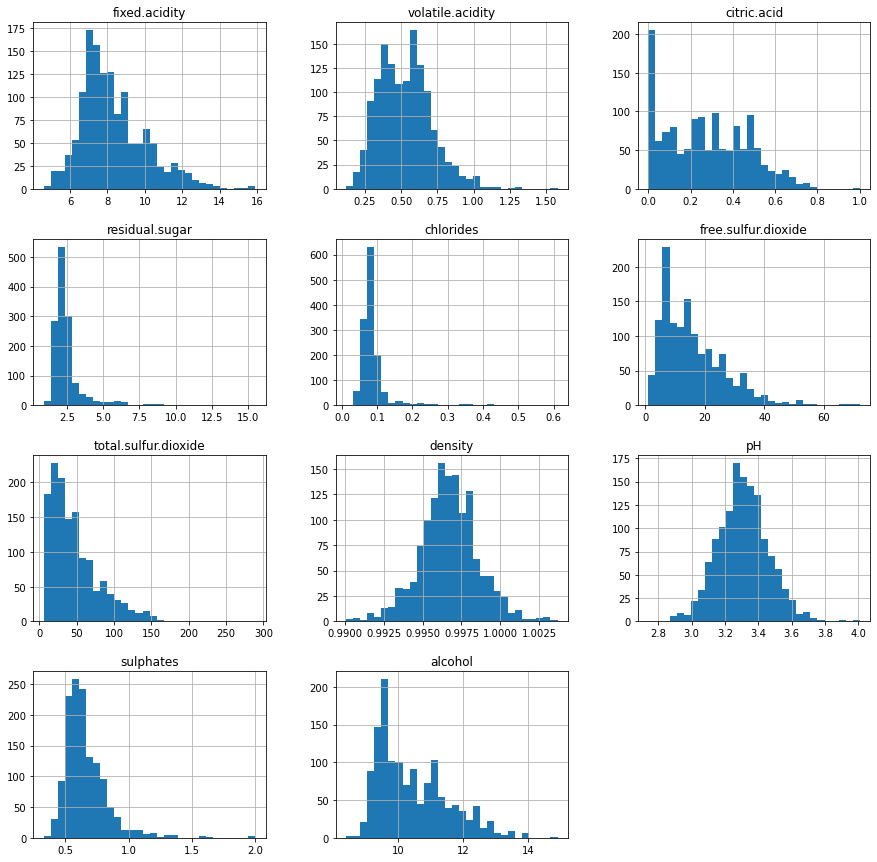

In [16]:
# plotting histograms for all continuous numerical variables
df[cont_vars].hist(bins=30, layout=(4,3) ,figsize=(15,15))
plt.show()

In [17]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

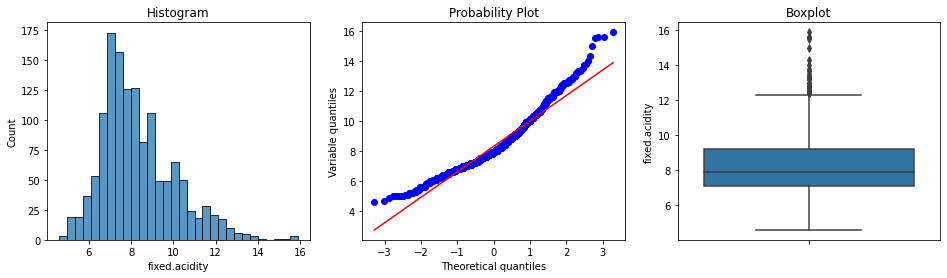

skewness of fixed.acidity is 0.94


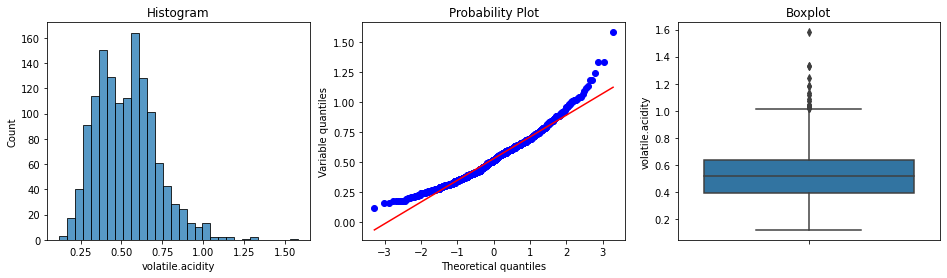

skewness of volatile.acidity is 0.73


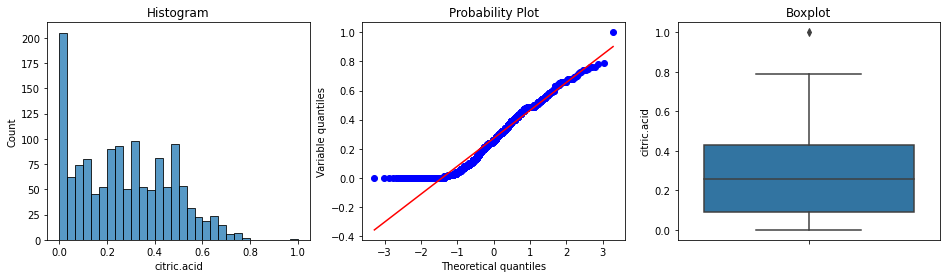

skewness of citric.acid is 0.31


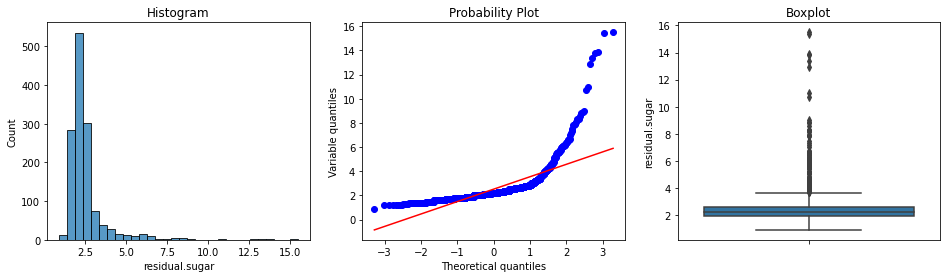

skewness of residual.sugar is 4.55


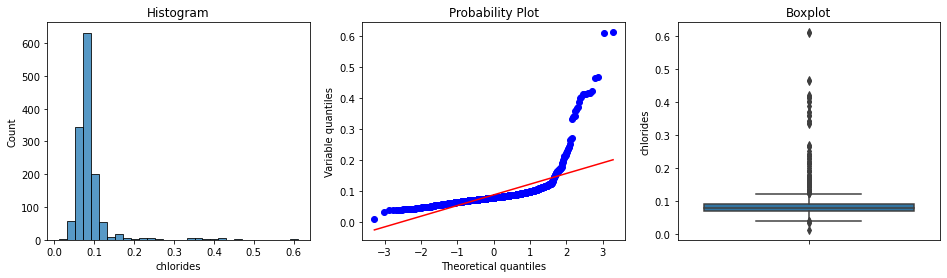

skewness of chlorides is 5.50


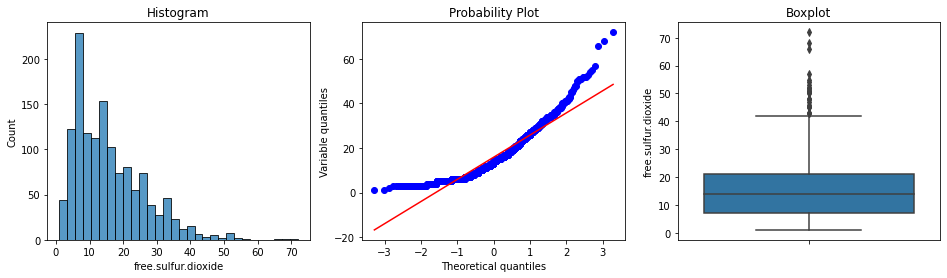

skewness of free.sulfur.dioxide is 1.23


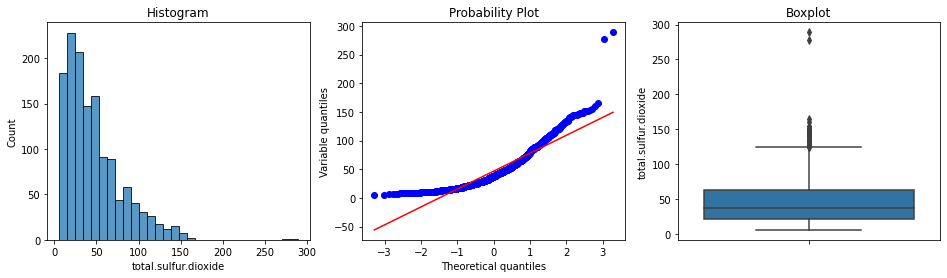

skewness of total.sulfur.dioxide is 1.54


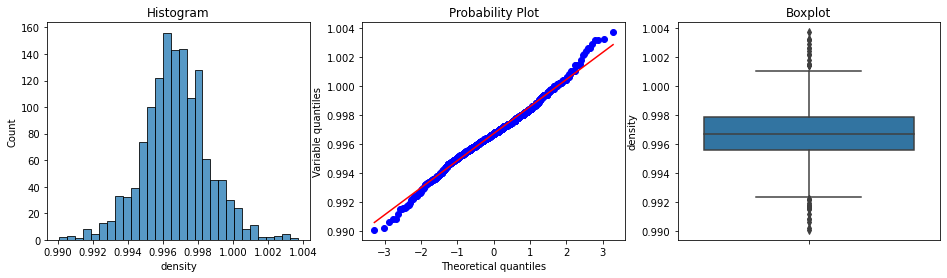

skewness of density is 0.04


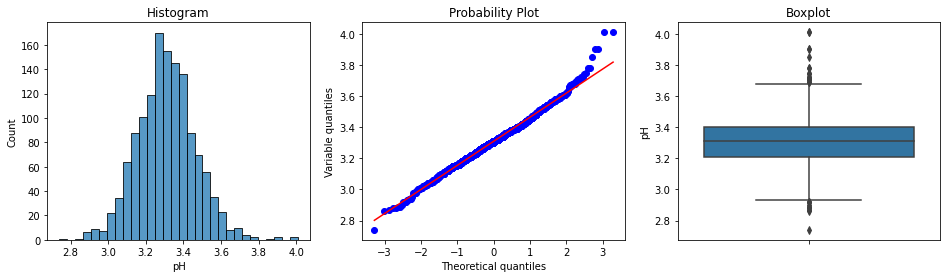

skewness of pH is 0.23


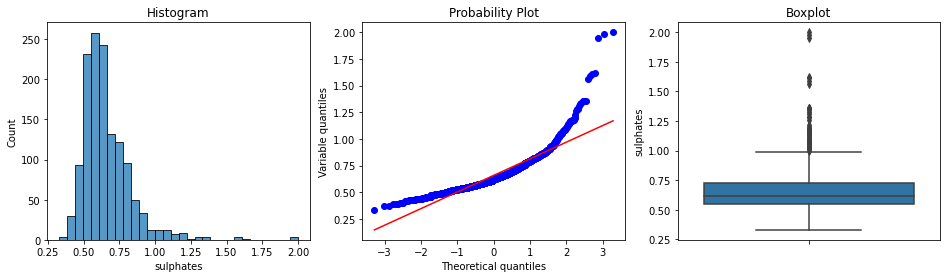

skewness of sulphates is 2.41


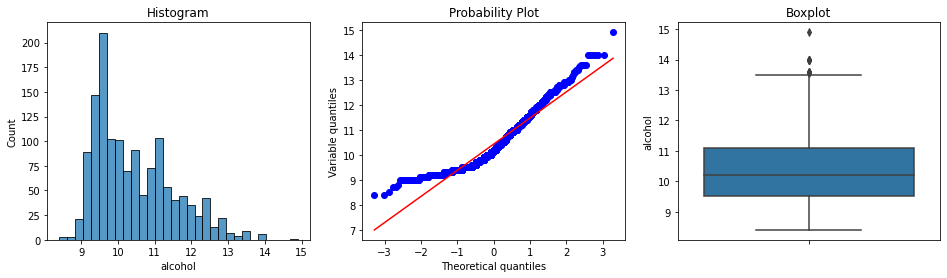

skewness of alcohol is 0.86


In [18]:
# plotting the continuous variables
for variable in cont_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

Variables residual.sugar and chlorides are highly skewed

<b>Yeo-Johnson transformation</b>

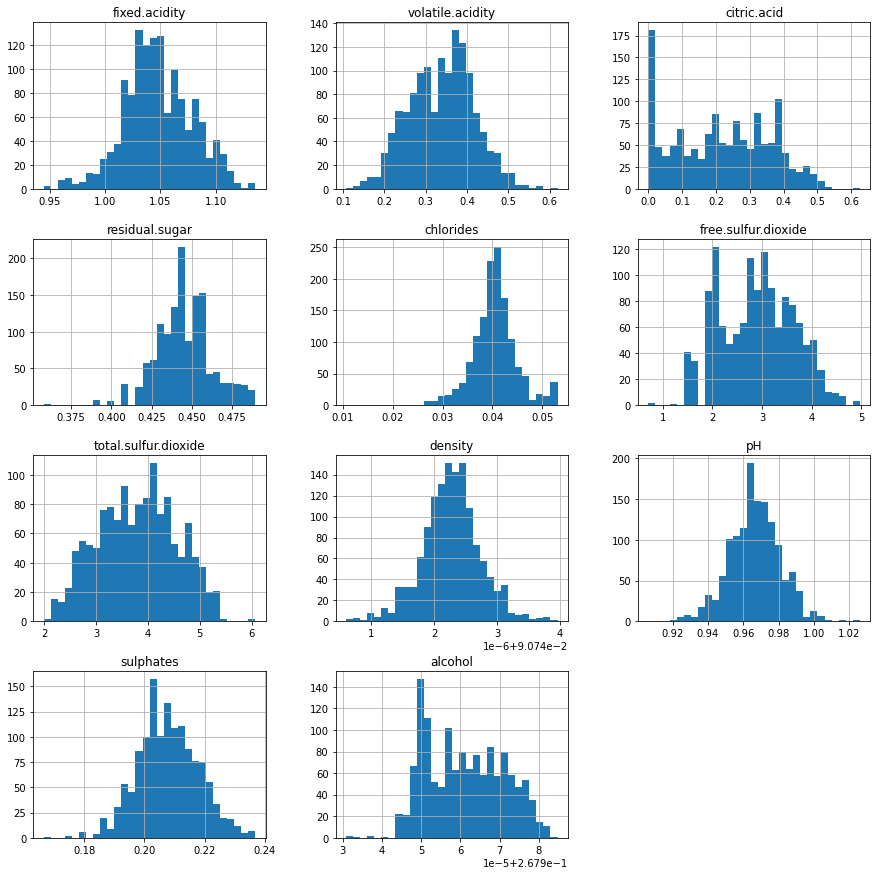

In [19]:
# Analysing the distributions of the variables after applying a Yeo-Johnson transformation

# temporary copy of the data
tmp = df.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

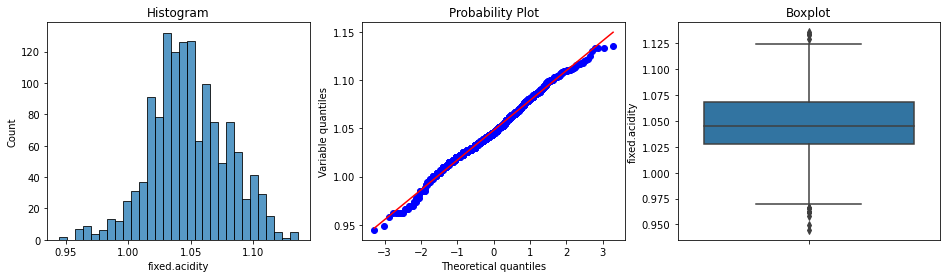

skewness of fixed.acidity is 0.00


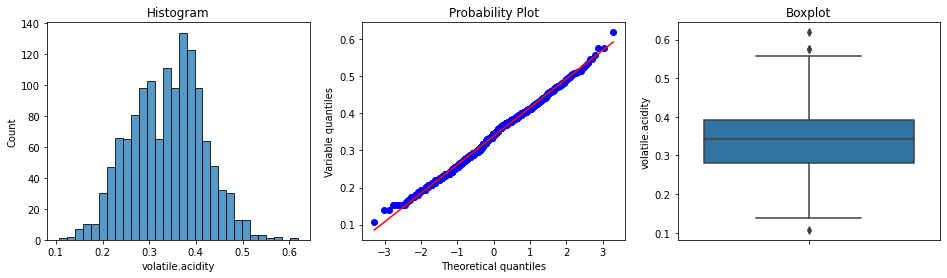

skewness of volatile.acidity is 0.01


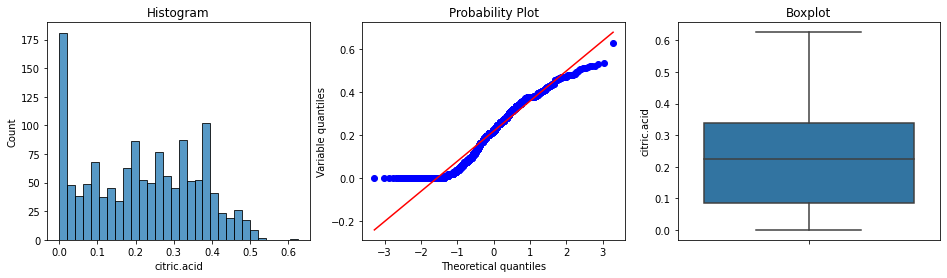

skewness of citric.acid is 0.02


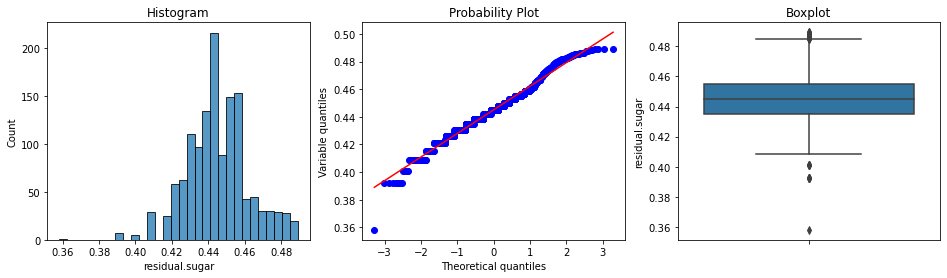

skewness of residual.sugar is -0.00


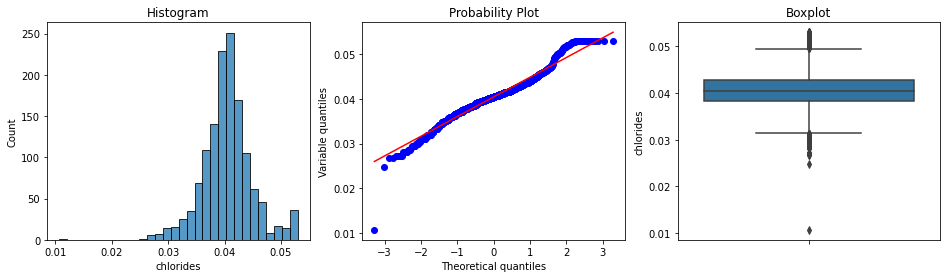

skewness of chlorides is -0.06


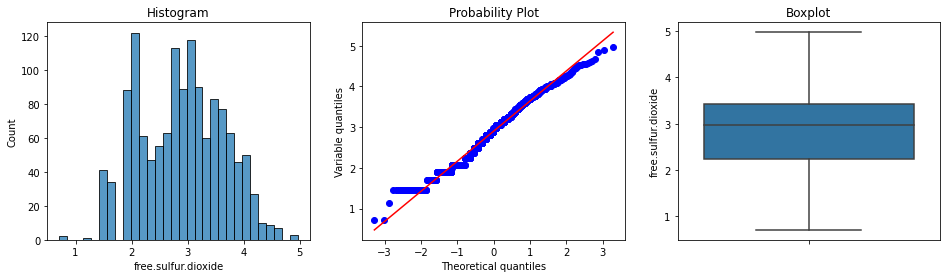

skewness of free.sulfur.dioxide is -0.01


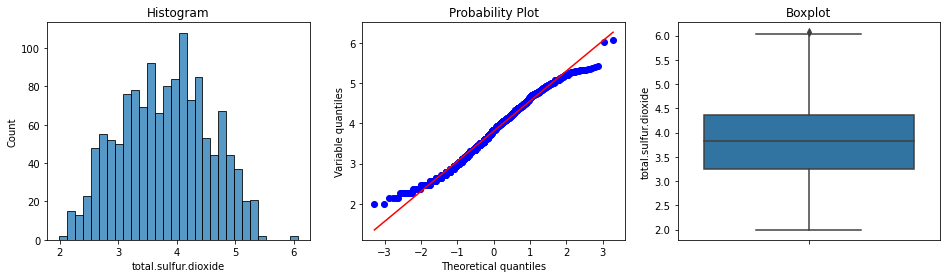

skewness of total.sulfur.dioxide is -0.00


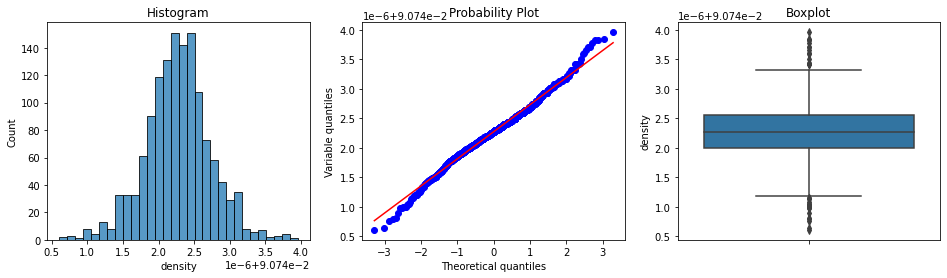

skewness of density is 0.00


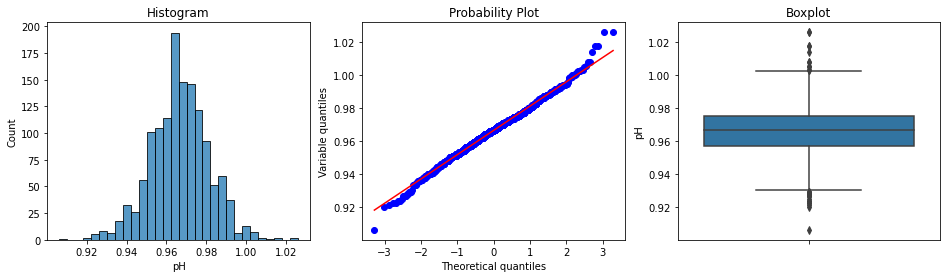

skewness of pH is -0.01


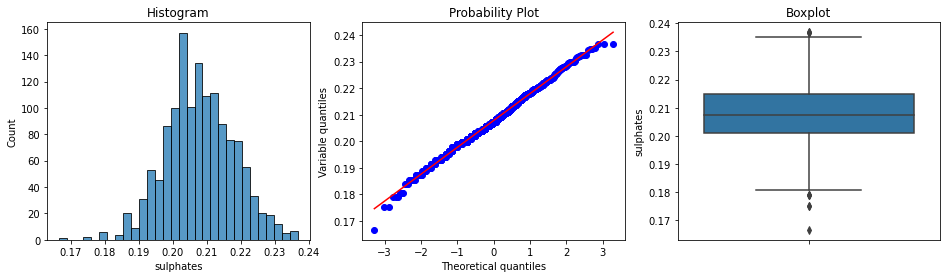

skewness of sulphates is 0.01


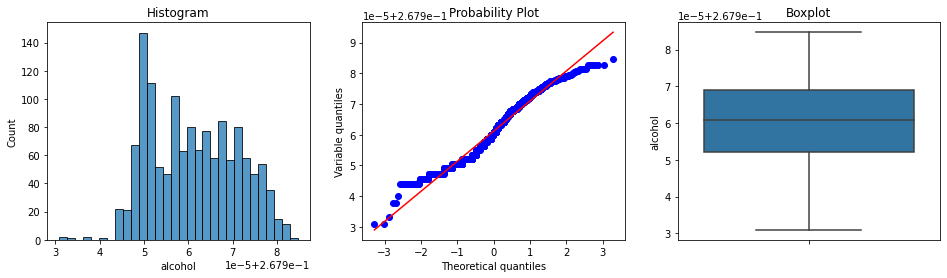

skewness of alcohol is 0.12


In [20]:
# plotting the continuous variables after the Yeo-Johnson transformation
for variable in cont_vars:
    diagnostic_plots(tmp, variable)
    # printing skewness
    skewness = tmp[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

The Yeo-Johnson transformation improved the distributions